In [45]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [30]:
x = pd.read_csv('multiTimeline.csv',header=1)
x = x.replace('<',0, regex=True)
# x = x.astype(int)
# x.plot(figsize=(30,15))
# x
x[['American Vandal: (United States)', 'Indebted: (United States)']].astype(int).sum()


American Vandal: (United States)    941
Indebted: (United States)           174
dtype: int64

In [35]:
tv_shows = pd.read_csv('tv_shows.csv',usecols=['Title','Year','Age','IMDb','Rotten Tomatoes','Netflix']).dropna().reset_index()
tv_shows = tv_shows.drop(columns='index')
tv_shows.columns = ['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes (%)','Netflix']
tv_shows['Rotten Tomatoes (%)'] = tv_shows['Rotten Tomatoes (%)'].replace('%','', regex=True)
tv_shows['Rotten Tomatoes (%)'] = tv_shows['Rotten Tomatoes (%)'].astype(int)
# tv_shows.Title == 'The Office'
# tv_shows_NF = tv_shows[tv_shows.Netflix == 1]
# tv_shows_NF = tv_shows[tv_shows.Year == 2020]
# tv_shows_NF = tv_shows.drop(tv_shows.Netflix == 0)
tv_shows = tv_shows[tv_shows.Netflix == 1]
tv_shows = tv_shows[tv_shows.Year == 2020]
tv_shows = tv_shows.sort_values(by='IMDb', ascending=False)
tv_shows = tv_shows.reset_index().drop(columns='index')
tv_shows.head(100)


tv_shows.loc[tv_shows['Title']=='Cheer']


,Title,Year,Age,IMDb,Rotten Tomatoes (%),Netflix
3,Cheer,2020,16+,8.2,96,1


In [5]:
shows_2020 = tv_shows[tv_shows.Year == 2020].reset_index()
shows_2019 = tv_shows[tv_shows.Year == 2019].reset_index()
shows_2018 = tv_shows[tv_shows.Year == 2018].reset_index()
shows_2017 = tv_shows[tv_shows.Year == 2017].reset_index()
shows_2016 = tv_shows[tv_shows.Year == 2016].reset_index()

In [6]:
shows_2020 = shows_2020.sort_values(by='IMDb', ascending=False)
shows_2020.sample(10)

,index,Title,Year,Age,IMDb,Rotten Tomatoes (%),Netflix
8,8,Spinning Out,2020,18+,7.7,63,1
9,9,Hollywood,2020,18+,7.7,57,1
7,7,Messiah,2020,18+,7.7,44,1
19,19,The Eddy,2020,18+,7.0,68,1
5,5,Never Have I Ever,2020,16+,8.0,97,1
12,12,The Circle,2020,18+,7.5,80,1
16,16,Gentefied,2020,16+,7.3,88,1
0,0,Middleditch & Schwartz,2020,18+,8.7,100,1
2,2,The Trials of Gabriel Fernandez,2020,18+,8.2,80,1
13,13,Self Made: Inspired by the Life of Madam C.J. ...,2020,16+,7.4,77,1


In [7]:
recent_5 = pd.concat([shows_2020,
shows_2019,
shows_2018,
shows_2017,
shows_2016],).reset_index().drop(columns=['index','level_0'])
recent_5.Title.value_counts().sample(10)

Tiger King: Murder, Mayhem and Madness    1
Queen Sono                                1
Messiah                                   1
Unorthodox                                1
Never Have I Ever                         1
Gentefied                                 1
Cooked With Cannabis                      1
Middleditch & Schwartz                    1
I Am Not Okay with This                   1
The Eddy                                  1
Name: Title, dtype: int64


Bad key "text.kerning_factor" on line 4 in
/Users/revph/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


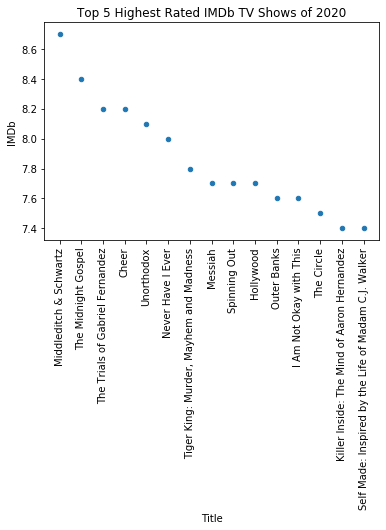

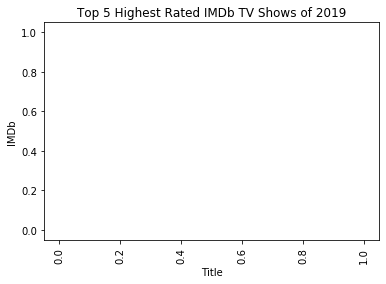

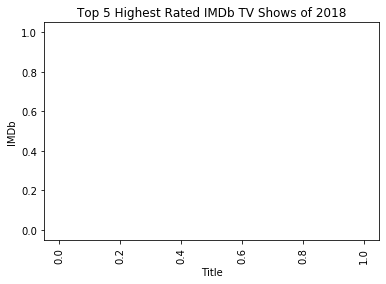

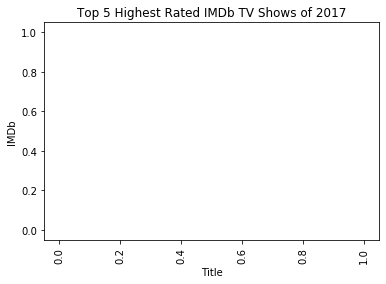

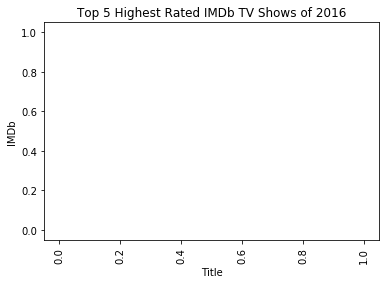

In [8]:
shows_2020.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2020', rot=90),
shows_2019.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2019', rot=90),
shows_2018.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2018', rot=90),
shows_2017.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2017', rot=90),
shows_2016.sort_values(by='IMDb',ascending=False).head(15).plot.scatter(x='Title',y='IMDb',title='Top 5 Highest Rated IMDb TV Shows of 2016', rot=90)

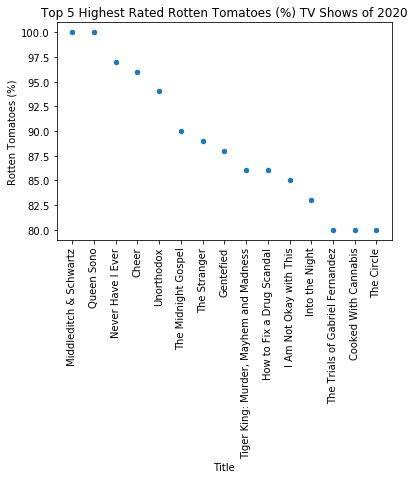

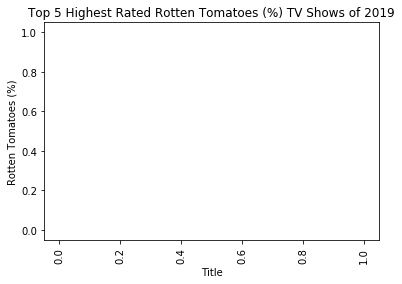

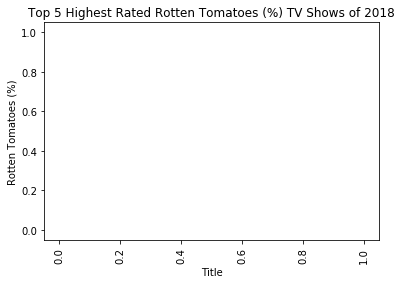

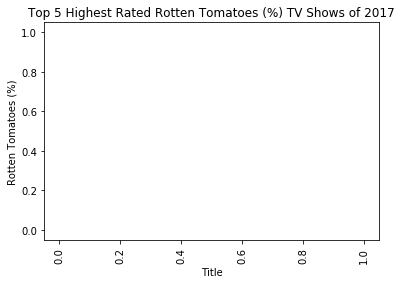

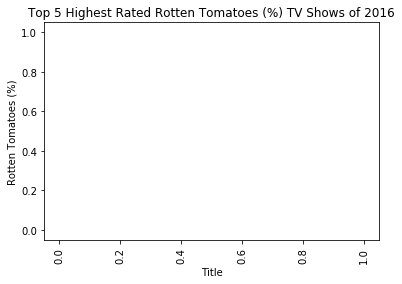

In [9]:
shows_2020.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2020', rot=90),
shows_2019.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2019', rot=90),
shows_2018.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2018', rot=90),
shows_2017.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2017', rot=90),
shows_2016.sort_values(by='Rotten Tomatoes (%)',ascending=False).head(15).plot.scatter(x='Title',y='Rotten Tomatoes (%)',title='Top 5 Highest Rated Rotten Tomatoes (%) TV Shows of 2016', rot=90)

In [10]:
# tv_shows[tv_shows['Title'] == 'Breaking Bad']
# tv_shows.Year.value_counts()
# yr_db = tv_shows[['Year','IMDb']]
# yr_db[yr_db['Year'] == 2020].tail().IMDb.sort_values(ascending=True).dropna().plot.bar(y='IMDb',figsize=(30,15))

In [38]:
sent = pd.read_csv('the_office_series.csv', usecols=['EpisodeTitle','About'])

In [46]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english')) 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


def tokenizer(text):
    """Tokenizes text."""
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
       
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

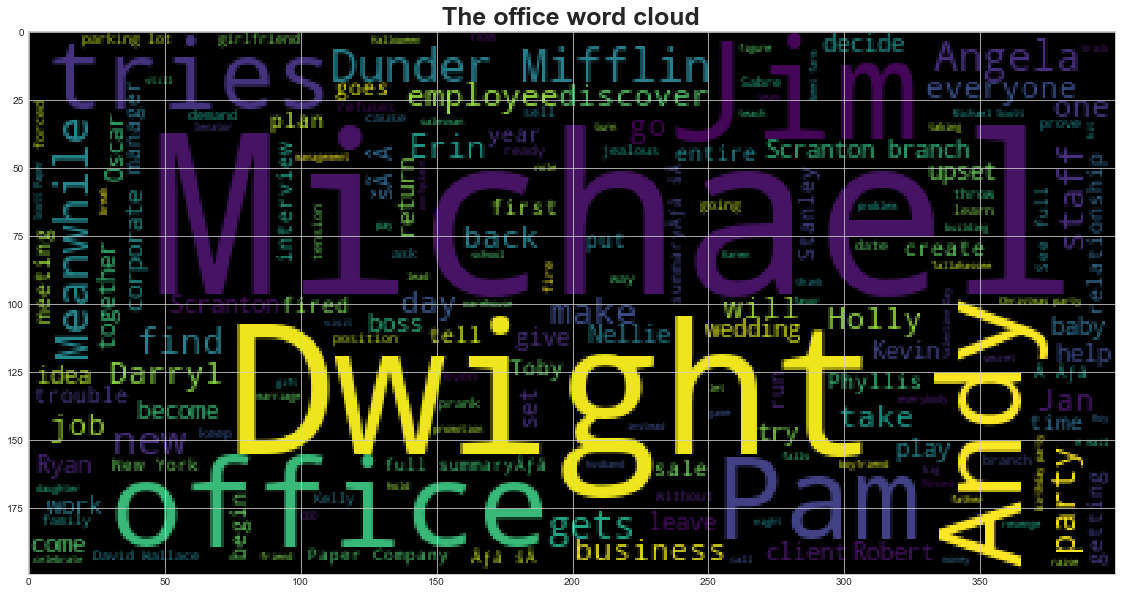

In [49]:
sent['tokens'] = sent['About'].apply(tokenizer)
sent_string = ' '.join(sent.About)

wc = WordCloud().generate(sent_string)
plt.title('The office word cloud', fontsize=25, fontweight='bold')
plt.imshow(wc)